# Multiclass classification problem

## Importing libs

In [4]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm_notebook
from sklearn import metrics
%matplotlib inline

## Data preprocessing

In [2]:
data = pd.read_csv("contest_train.csv")
data.head()

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1053371037,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,...,39.0,2.0,223.118594,290.015143,1.0,1.0,0.0,1.0,2.0,2.0
1,76507184,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,329.828334,...,25.0,82.0,479.616045,611.651594,0.0,1.0,0.0,1.0,1.0,1.0
2,76753690,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.427338,...,119.0,0.0,352.268014,564.573421,1.0,1.0,0.0,1.0,1.0,1.0
3,1026167358,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23.621397,...,1.0,0.0,410.524985,421.653876,1.0,0.0,0.0,1.0,2.0,2.0
4,7220095746,0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,677.745861,...,21.0,0.0,439.171356,476.189288,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:
target = data['TARGET'] #Удаляю таргет, чтобы можно было объединить
del data['TARGET']

In [4]:
data_test = pd.read_csv("contest_test.csv")
data_test.head()

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1154270440,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-46.950807,-45.018511,...,0.0,0.0,190.587701,162.047775,1.0,0.0,1.0,1.0,1.0,1.0
1,1147987574,0.0,0.0,1.0,0.0,0.0,0.0,0.0,343.627489,NaN,...,5.0,109.0,594.572663,685.500149,1.0,1.0,0.0,1.0,1.0,2.0
2,1129622364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,909.178045,3260.445427,...,0.0,297.0,10.214396,300.397949,0.0,0.0,0.0,1.0,1.0,1.0
3,619797496,6.0,2.0,0.0,0.0,0.0,0.0,0.0,-4.499021,-93.374738,...,1.0,2.0,334.873280,363.739214,1.0,1.0,1.0,2.0,2.0,1.0
4,7391484886,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-23.189787,-35.810318,...,83.0,136.0,551.413748,769.830050,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
full_data = pd.concat([data,data_test],axis=0)

If there are less than 20 unique values, the feature is considered as categorical one. Otherwise, this is a real variable.

In [9]:
cat_feature = []
real_feature = []
for column in tqdm_notebook(full_data.columns):
    if full_data[column].unique().shape[0] <= 20:
        cat_feature.append(column)
    else:
        real_feature.append(column)

HBox(children=(IntProgress(value=0, max=261), HTML(value='')))

In [ ]:
# Filling the gaps by mean value of the feature
for column in real_feature:
    full_data[column] = full_data[column].fillna(data[column].mean())

(array([17372.,     0.,     0.,     0.,     0.,  5650.,     0.,     0.,
            0.,  1499.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

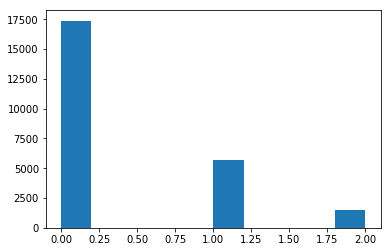

In [13]:
plt.hist(target) # Distribution of target variable

As can be seen, there is a minority of class 2. Most target values are class 0.

In [14]:
data_cat = full_data[cat_feature] # Categorical features
data_real = full_data[real_feature] # Real variables

_______________

## Real features

### Feature extraction based on correlation

The idea is to delete the features that are the most correlated with target.

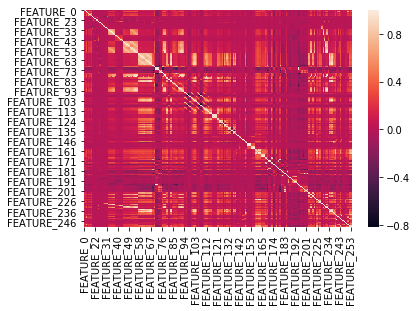

In [17]:
import seaborn as sns

# calculate the correlation matrix
corr = data_real[data_real.columns[1:]].corr()

# plot the heatmap
sns.heatmap(corr)

In [19]:
strongly_correlated = []
left_feature = []
right_feature = []
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr[i][j]) > 0.90:
            if [j,i] not in strongly_correlated:
                strongly_correlated.append([i,j])
                left_feature.append(i)
                right_feature.append(j)

In [20]:
right_unic = []
for j in right_feature:
    if j not in right_unic:
        right_unic.append(j)
left_unic = []
for i in left_feature:
    if i not in left_unic:
        left_unic.append(i)
print (len(left_unic), len(right_unic))

46 35


Remove strongly correlated variables.

In [22]:
for i in left_unic:
    del data_real[i]

Let's try to extract the useless features based on a model feature importances.

### Feature extraction based on linear model

In [25]:
(X_train, X_test, Y_train,  Y_test) = train_test_split(data_real[:len(target)],
                                                                      target,test_size=0.2, random_state=42)

In [26]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [27]:
# Normalize the real variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform( X_test)

In [ ]:
# Linear models
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression (multi_class = 'ovr' ,solver = 'saga', penalty= 'l1' )
model.fit(X_train,Y_train)
predict = model.predict(X_test)
metric = metrics.accuracy_score(Y_test, predict)

In [29]:
coef = model.coef_
coef_0 = list(map(lambda x: abs(round(x,3)), coef[0]))
print(coef_0[0])

0.027


If the coefficient of a variable is less than coefficient of the const, the variable will be deleted.

In [30]:
little_coef = []
little = 0.028
for i in range(1,len(coef[0])):
    if coef[0][i] < little and coef[1][i] < little and coef[2][i] < little:
        little_coef.append(i)
print(len(little_coef))

51


In [31]:
list_to_del_coef = data_real.columns[little_coef]

In [33]:
for i in list_to_del_coef:
    del data_real[i]

Other idea is to delete real variables with small variance.

In [36]:
list_of_std = []
for i in data_real.columns[1:]:
    list_of_std.append([i,np.array(list(data_real[i])).std() ])

In [37]:
little_std = []
little = 4
for i in list_of_std:
    if i[1] < little:
        little_std.append(i[0])

In [39]:
for i in little_std:
    del data_real[i]

In [ ]:
# MinMax scaler
ID = data_real['ID']
data_real.drop('ID', axis=1, inplace=True)
data_real = (data_real-data_real.min())/(data_real.max()-data_real.min())
data_real['ID'] = ID

_____________
## Categorial features

In [43]:
data_cat = data_cat.fillna(-1) # Fill gaps by -1
data_cat = data_cat.applymap(str)

In [44]:
# label encoding
data_label_cat = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data_cat.columns:
    data_label_cat[i] = le.fit_transform(data_cat[i])
data_label_cat.head()

,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_15,FEATURE_16,...,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_249,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,1,1,1,0,2,1
1,0,0,1,0,0,6,2,1,1,0,...,0,1,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,1,0,1,0,2,1
4,1,0,1,0,0,6,2,1,0,1,...,0,1,0,0,1,1,1,0,1,0


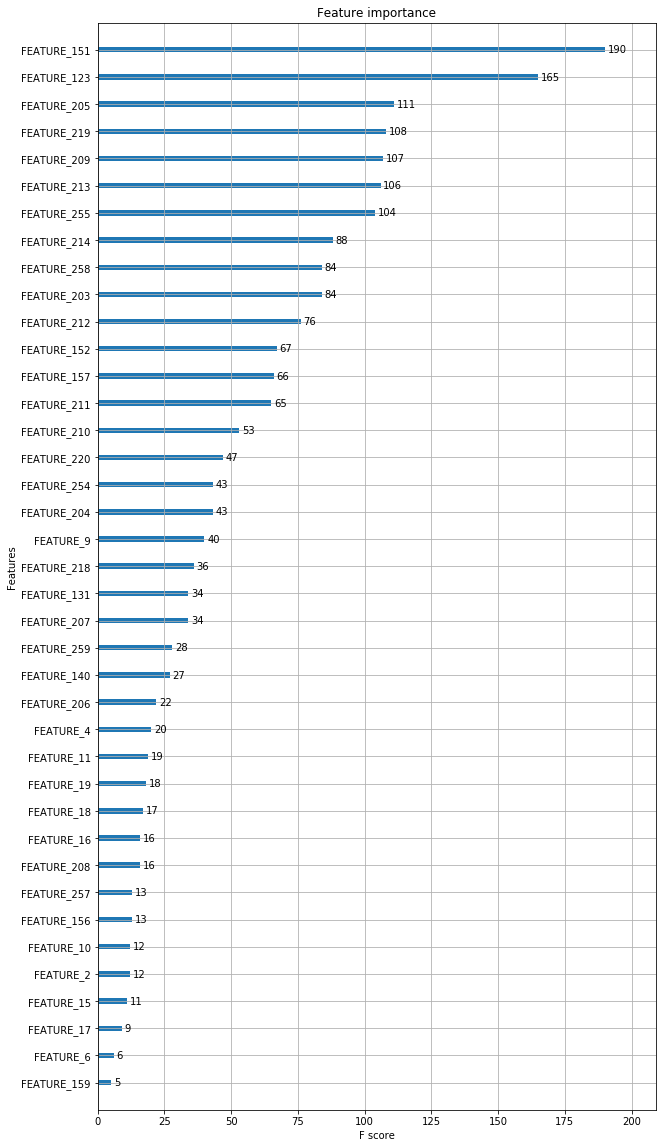

In [45]:
# Choose the features based on Boosting feature importances
from xgboost import XGBClassifier
%matplotlib inline
def my_plot_importance(booster, figsize, **kwargs):
    from xgboost import plot_importance
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

model = XGBClassifier()
model.fit(data_label_cat[:len(target)] , target)
impotant_of_cat = my_plot_importance(model , (10,20))

In [46]:
list_to_del_cat = []
for i in range(len(data_label_cat.columns)):
    if model.feature_importances_[i] <= model.feature_importances_[-1]: # Compare with FEATURE_259
        list_to_del_cat.append(data_label_cat.columns[i])
print(list_to_del_cat)

['FEATURE_2', 'FEATURE_3', 'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_10', 'FEATURE_11', 'FEATURE_15', 'FEATURE_16', 'FEATURE_17', 'FEATURE_18', 'FEATURE_19', 'FEATURE_140', 'FEATURE_156', 'FEATURE_159', 'FEATURE_206', 'FEATURE_208', 'FEATURE_249', 'FEATURE_256', 'FEATURE_257', 'FEATURE_259']


In [48]:
for i in list_to_del_cat:
    del data_label_cat[i]

### Target Encoding!

In [ ]:
new_train = data_label_cat[:len(target)]
new_train['target'] = target
new_test = data_label_cat[len(target):]
new_test['target'] = np.NaN
columns = new_train.columns[:-1]

In [ ]:
from  sklearn.model_selection import KFold
def mean_reg_encoding(x_tr , x_val , cat , target , globalmean , a = 10):
    mean = x_val[cat].map(x_tr.groupby(cat)[target].mean())
    nrows = x_val[cat].map(x_tr.groupby(cat)[target].size())
    return (mean*nrows + globalmean*a)/(nrows+a)

def std_reg_encoding(x_tr , x_val , cat , target):
    return x_val[cat].map(x_tr.groupby(cat)[target].std()) 

gloabalmean = target.mean()
    
cv = [KFold(4, shuffle=True, random_state=1) , KFold(4, shuffle=True, random_state=1)]


for _, V in cv[0].split(new_train.index):
    for tr_ind, val_ind in (cv[1].split(new_train.loc[V].index )):
        for cat in columns:
            new_train.loc[val_ind , cat + '_mean'] = mean_reg_encoding(
                new_train.loc[tr_ind, ['target',cat]],
                new_train.loc[val_ind, ['target', cat]],
                cat, 'target', gloabalmean
            )
            new_train.loc[val_ind, cat + '_std'] = std_reg_encoding(
                new_train.loc[tr_ind, ['target',cat]],
                new_train.loc[val_ind , ['target', cat]],
                cat, 'target'
            )

for cat in columns:
    new_test.loc[:, cat + '_mean'] = mean_reg_encoding(new_train[['target', cat]],
                                                       new_test[['target', cat]],
                                                       cat ,'target' , gloabalmean
                                                      )
    new_test.loc[:, cat + '_std'] = std_reg_encoding(new_train[['target', cat]],
                                                     new_test[['target', cat]],
                                                     cat ,'target'
                                                    )
    
    new_train.loc[:, cat + '_mean'].fillna(gloabalmean, inplace=True)
    new_test.loc[:, cat + '_mean'].fillna(gloabalmean , inplace=True)
    new_train.loc[:, cat + '_std'].fillna(0, inplace=True)
    new_test.loc[:, cat + '_std'].fillna(0 , inplace=True)

________
### Uniting all datasets

In [52]:
print (data_real.shape, new_train.shape, new_test.shape)

(34005, 112) (24521, 67) (9484, 67)


In [ ]:
new_train.drop('target', axis =1 , inplace=True)
new_test.drop('target', axis =1 , inplace=True)

In [54]:
data_real_train = data_real[:len(target)]
data_real_test = data_real[len(target):]

In [55]:
X_train = pd.concat([new_train,data_real_train], axis = 1)

In [103]:
X_test = pd.concat([new_test.reset_index().drop('index', axis=1),data_real_test], axis = 1)

---------------

## Traning Models and stacking them

In [57]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import lightgbm as lgbm
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [71]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'application': 'multiclass',
    'metric': 'acc',
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'objective': 'cross_entropy',
    'learning_rate': 0.01,
    'min_child_weight': 50,
    'max_depth': 5,  
}
lgb1 = lgbm.sklearn.LGBMClassifier(n_estimators=800, random_state=42, **params)
lgb2 = lgbm.sklearn.LGBMClassifier(n_estimators=1000, random_state=42, **params)
log_reg = LogisticRegression()
clf = RandomForestClassifier(max_depth=8)
extra = ExtraTreesClassifier(n_estimators = 900, n_jobs=10)
sv = SVC()
cat = CatBoostClassifier()
ada = AdaBoostClassifier(base_estimator=extra, n_estimators=10)
knn10 = KNN(n_neighbors=10)
knn40 = KNN(n_neighbors=40)
knn500 = KNN(n_neighbors=500)

meta_models = [lgb1, log_reg, clf, knn10, knn40]
main_model = lgb2

In [59]:
metric = cross_val_score(cat, X_train, target, cv = 4)

0:	learn: 0.6854020	total: 82.9ms	remaining: 1m 22s
1:	learn: 0.6782125	total: 116ms	remaining: 58s
2:	learn: 0.6713328	total: 150ms	remaining: 50s
3:	learn: 0.6648621	total: 190ms	remaining: 47.4s
4:	learn: 0.6589652	total: 222ms	remaining: 44.2s
5:	learn: 0.6530894	total: 257ms	remaining: 42.5s
6:	learn: 0.6477443	total: 289ms	remaining: 41s
7:	learn: 0.6425803	total: 326ms	remaining: 40.5s
8:	learn: 0.6378547	total: 377ms	remaining: 41.5s
9:	learn: 0.6331623	total: 419ms	remaining: 41.5s
10:	learn: 0.6289544	total: 462ms	remaining: 41.6s
11:	learn: 0.6251315	total: 508ms	remaining: 41.9s
12:	learn: 0.6221087	total: 565ms	remaining: 42.9s
13:	learn: 0.6185919	total: 601ms	remaining: 42.3s
14:	learn: 0.6151049	total: 641ms	remaining: 42.1s
15:	learn: 0.6116280	total: 690ms	remaining: 42.4s
16:	learn: 0.6082701	total: 739ms	remaining: 42.7s
17:	learn: 0.6053090	total: 784ms	remaining: 42.8s
18:	learn: 0.6024509	total: 832ms	remaining: 43s
19:	learn: 0.6000295	total: 878ms	remaining: 43

161:	learn: 0.5264425	total: 5.99s	remaining: 31s
162:	learn: 0.5263310	total: 6.03s	remaining: 31s
163:	learn: 0.5261687	total: 6.06s	remaining: 30.9s
164:	learn: 0.5259765	total: 6.1s	remaining: 30.9s
165:	learn: 0.5257845	total: 6.13s	remaining: 30.8s
166:	learn: 0.5256467	total: 6.17s	remaining: 30.8s
167:	learn: 0.5254784	total: 6.2s	remaining: 30.7s
168:	learn: 0.5253136	total: 6.24s	remaining: 30.7s
169:	learn: 0.5251937	total: 6.27s	remaining: 30.6s
170:	learn: 0.5249938	total: 6.3s	remaining: 30.6s
171:	learn: 0.5248633	total: 6.34s	remaining: 30.5s
172:	learn: 0.5247246	total: 6.37s	remaining: 30.4s
173:	learn: 0.5245561	total: 6.4s	remaining: 30.4s
174:	learn: 0.5243346	total: 6.44s	remaining: 30.4s
175:	learn: 0.5241034	total: 6.48s	remaining: 30.3s
176:	learn: 0.5240385	total: 6.51s	remaining: 30.3s
177:	learn: 0.5238254	total: 6.54s	remaining: 30.2s
178:	learn: 0.5236914	total: 6.57s	remaining: 30.1s
179:	learn: 0.5235569	total: 6.6s	remaining: 30.1s
180:	learn: 0.5233049

325:	learn: 0.5036310	total: 11.5s	remaining: 23.7s
326:	learn: 0.5035246	total: 11.5s	remaining: 23.7s
327:	learn: 0.5034076	total: 11.5s	remaining: 23.6s
328:	learn: 0.5032941	total: 11.6s	remaining: 23.6s
329:	learn: 0.5031432	total: 11.6s	remaining: 23.6s
330:	learn: 0.5029898	total: 11.6s	remaining: 23.5s
331:	learn: 0.5028540	total: 11.7s	remaining: 23.5s
332:	learn: 0.5027740	total: 11.7s	remaining: 23.4s
333:	learn: 0.5026659	total: 11.7s	remaining: 23.4s
334:	learn: 0.5025433	total: 11.8s	remaining: 23.4s
335:	learn: 0.5023530	total: 11.8s	remaining: 23.3s
336:	learn: 0.5022178	total: 11.8s	remaining: 23.3s
337:	learn: 0.5021205	total: 11.9s	remaining: 23.2s
338:	learn: 0.5020124	total: 11.9s	remaining: 23.2s
339:	learn: 0.5018315	total: 11.9s	remaining: 23.2s
340:	learn: 0.5017226	total: 12s	remaining: 23.1s
341:	learn: 0.5015946	total: 12s	remaining: 23.1s
342:	learn: 0.5014906	total: 12s	remaining: 23s
343:	learn: 0.5013030	total: 12.1s	remaining: 23s
344:	learn: 0.5012143	

486:	learn: 0.4823262	total: 17.6s	remaining: 18.5s
487:	learn: 0.4822283	total: 17.6s	remaining: 18.5s
488:	learn: 0.4820515	total: 17.7s	remaining: 18.5s
489:	learn: 0.4819010	total: 17.8s	remaining: 18.5s
490:	learn: 0.4817202	total: 17.8s	remaining: 18.5s
491:	learn: 0.4815778	total: 17.9s	remaining: 18.5s
492:	learn: 0.4814195	total: 18s	remaining: 18.5s
493:	learn: 0.4812713	total: 18s	remaining: 18.5s
494:	learn: 0.4811309	total: 18.1s	remaining: 18.5s
495:	learn: 0.4809650	total: 18.2s	remaining: 18.4s
496:	learn: 0.4808586	total: 18.2s	remaining: 18.4s
497:	learn: 0.4807227	total: 18.3s	remaining: 18.4s
498:	learn: 0.4806680	total: 18.3s	remaining: 18.4s
499:	learn: 0.4804786	total: 18.4s	remaining: 18.4s
500:	learn: 0.4803603	total: 18.5s	remaining: 18.4s
501:	learn: 0.4802444	total: 18.5s	remaining: 18.4s
502:	learn: 0.4801410	total: 18.6s	remaining: 18.4s
503:	learn: 0.4800565	total: 18.7s	remaining: 18.4s
504:	learn: 0.4799062	total: 18.7s	remaining: 18.3s
505:	learn: 0.47

645:	learn: 0.4627929	total: 24.5s	remaining: 13.4s
646:	learn: 0.4626988	total: 24.6s	remaining: 13.4s
647:	learn: 0.4626478	total: 24.6s	remaining: 13.4s
648:	learn: 0.4625178	total: 24.6s	remaining: 13.3s
649:	learn: 0.4624079	total: 24.7s	remaining: 13.3s
650:	learn: 0.4622934	total: 24.7s	remaining: 13.2s
651:	learn: 0.4621344	total: 24.8s	remaining: 13.2s
652:	learn: 0.4619995	total: 24.8s	remaining: 13.2s
653:	learn: 0.4618976	total: 24.8s	remaining: 13.1s
654:	learn: 0.4617795	total: 24.9s	remaining: 13.1s
655:	learn: 0.4616460	total: 24.9s	remaining: 13.1s
656:	learn: 0.4615336	total: 24.9s	remaining: 13s
657:	learn: 0.4614553	total: 25s	remaining: 13s
658:	learn: 0.4613517	total: 25s	remaining: 12.9s
659:	learn: 0.4612827	total: 25.1s	remaining: 12.9s
660:	learn: 0.4611563	total: 25.1s	remaining: 12.9s
661:	learn: 0.4610801	total: 25.1s	remaining: 12.8s
662:	learn: 0.4609395	total: 25.2s	remaining: 12.8s
663:	learn: 0.4608519	total: 25.2s	remaining: 12.7s
664:	learn: 0.460777

807:	learn: 0.4460538	total: 31.1s	remaining: 7.4s
808:	learn: 0.4459461	total: 31.2s	remaining: 7.36s
809:	learn: 0.4458294	total: 31.2s	remaining: 7.33s
810:	learn: 0.4456998	total: 31.3s	remaining: 7.29s
811:	learn: 0.4456008	total: 31.3s	remaining: 7.25s
812:	learn: 0.4455299	total: 31.3s	remaining: 7.21s
813:	learn: 0.4453996	total: 31.4s	remaining: 7.17s
814:	learn: 0.4452981	total: 31.4s	remaining: 7.13s
815:	learn: 0.4451661	total: 31.4s	remaining: 7.09s
816:	learn: 0.4450989	total: 31.5s	remaining: 7.05s
817:	learn: 0.4449267	total: 31.5s	remaining: 7.01s
818:	learn: 0.4448217	total: 31.6s	remaining: 6.97s
819:	learn: 0.4446610	total: 31.6s	remaining: 6.94s
820:	learn: 0.4445610	total: 31.6s	remaining: 6.9s
821:	learn: 0.4444121	total: 31.7s	remaining: 6.86s
822:	learn: 0.4443585	total: 31.7s	remaining: 6.82s
823:	learn: 0.4442427	total: 31.7s	remaining: 6.78s
824:	learn: 0.4441734	total: 31.8s	remaining: 6.74s
825:	learn: 0.4440923	total: 31.8s	remaining: 6.7s
826:	learn: 0.4

970:	learn: 0.4298534	total: 37.1s	remaining: 1.11s
971:	learn: 0.4297960	total: 37.1s	remaining: 1.07s
972:	learn: 0.4297179	total: 37.1s	remaining: 1.03s
973:	learn: 0.4296527	total: 37.2s	remaining: 992ms
974:	learn: 0.4295572	total: 37.2s	remaining: 954ms
975:	learn: 0.4294793	total: 37.2s	remaining: 916ms
976:	learn: 0.4293856	total: 37.3s	remaining: 878ms
977:	learn: 0.4292787	total: 37.3s	remaining: 840ms
978:	learn: 0.4291469	total: 37.4s	remaining: 802ms
979:	learn: 0.4290540	total: 37.4s	remaining: 763ms
980:	learn: 0.4289455	total: 37.4s	remaining: 725ms
981:	learn: 0.4288710	total: 37.5s	remaining: 687ms
982:	learn: 0.4287844	total: 37.5s	remaining: 649ms
983:	learn: 0.4287086	total: 37.6s	remaining: 611ms
984:	learn: 0.4286150	total: 37.6s	remaining: 573ms
985:	learn: 0.4285177	total: 37.6s	remaining: 534ms
986:	learn: 0.4284097	total: 37.7s	remaining: 496ms
987:	learn: 0.4283297	total: 37.7s	remaining: 458ms
988:	learn: 0.4282538	total: 37.7s	remaining: 420ms
989:	learn: 

134:	learn: 0.5314497	total: 7.8s	remaining: 50s
135:	learn: 0.5313035	total: 7.85s	remaining: 49.9s
136:	learn: 0.5311221	total: 7.89s	remaining: 49.7s
137:	learn: 0.5308418	total: 7.93s	remaining: 49.6s
138:	learn: 0.5307185	total: 7.98s	remaining: 49.4s
139:	learn: 0.5304812	total: 8.02s	remaining: 49.3s
140:	learn: 0.5302442	total: 8.07s	remaining: 49.1s
141:	learn: 0.5300763	total: 8.11s	remaining: 49s
142:	learn: 0.5299066	total: 8.15s	remaining: 48.8s
143:	learn: 0.5296818	total: 8.19s	remaining: 48.7s
144:	learn: 0.5294936	total: 8.23s	remaining: 48.6s
145:	learn: 0.5292337	total: 8.29s	remaining: 48.5s
146:	learn: 0.5290252	total: 8.33s	remaining: 48.3s
147:	learn: 0.5287624	total: 8.37s	remaining: 48.2s
148:	learn: 0.5285677	total: 8.42s	remaining: 48.1s
149:	learn: 0.5283798	total: 8.47s	remaining: 48s
150:	learn: 0.5281367	total: 8.52s	remaining: 47.9s
151:	learn: 0.5279875	total: 8.56s	remaining: 47.8s
152:	learn: 0.5278301	total: 8.61s	remaining: 47.7s
153:	learn: 0.52763

294:	learn: 0.5063822	total: 14.7s	remaining: 35.2s
295:	learn: 0.5062892	total: 14.8s	remaining: 35.2s
296:	learn: 0.5061896	total: 14.8s	remaining: 35.1s
297:	learn: 0.5060611	total: 14.9s	remaining: 35.1s
298:	learn: 0.5059274	total: 14.9s	remaining: 35s
299:	learn: 0.5057590	total: 15s	remaining: 34.9s
300:	learn: 0.5056414	total: 15s	remaining: 34.9s
301:	learn: 0.5054486	total: 15.1s	remaining: 34.8s
302:	learn: 0.5052716	total: 15.1s	remaining: 34.8s
303:	learn: 0.5051811	total: 15.2s	remaining: 34.7s
304:	learn: 0.5050379	total: 15.2s	remaining: 34.7s
305:	learn: 0.5049491	total: 15.3s	remaining: 34.6s
306:	learn: 0.5048115	total: 15.3s	remaining: 34.5s
307:	learn: 0.5046650	total: 15.3s	remaining: 34.5s
308:	learn: 0.5045183	total: 15.4s	remaining: 34.4s
309:	learn: 0.5044440	total: 15.4s	remaining: 34.3s
310:	learn: 0.5042920	total: 15.5s	remaining: 34.3s
311:	learn: 0.5041343	total: 15.5s	remaining: 34.2s
312:	learn: 0.5039536	total: 15.6s	remaining: 34.2s
313:	learn: 0.5038

453:	learn: 0.4840678	total: 21.7s	remaining: 26.1s
454:	learn: 0.4839480	total: 21.8s	remaining: 26.1s
455:	learn: 0.4838041	total: 21.8s	remaining: 26s
456:	learn: 0.4836428	total: 21.8s	remaining: 25.9s
457:	learn: 0.4835230	total: 21.9s	remaining: 25.9s
458:	learn: 0.4833992	total: 21.9s	remaining: 25.8s
459:	learn: 0.4832245	total: 22s	remaining: 25.8s
460:	learn: 0.4831460	total: 22s	remaining: 25.7s
461:	learn: 0.4829662	total: 22s	remaining: 25.7s
462:	learn: 0.4827931	total: 22.1s	remaining: 25.6s
463:	learn: 0.4826726	total: 22.1s	remaining: 25.6s
464:	learn: 0.4825630	total: 22.2s	remaining: 25.5s
465:	learn: 0.4824208	total: 22.2s	remaining: 25.5s
466:	learn: 0.4823110	total: 22.3s	remaining: 25.4s
467:	learn: 0.4821958	total: 22.3s	remaining: 25.3s
468:	learn: 0.4820372	total: 22.3s	remaining: 25.3s
469:	learn: 0.4819300	total: 22.4s	remaining: 25.2s
470:	learn: 0.4817662	total: 22.4s	remaining: 25.2s
471:	learn: 0.4816479	total: 22.5s	remaining: 25.1s
472:	learn: 0.481515

613:	learn: 0.4645606	total: 28.6s	remaining: 18s
614:	learn: 0.4644984	total: 28.7s	remaining: 17.9s
615:	learn: 0.4643371	total: 28.7s	remaining: 17.9s
616:	learn: 0.4641989	total: 28.8s	remaining: 17.9s
617:	learn: 0.4640728	total: 28.9s	remaining: 17.9s
618:	learn: 0.4639230	total: 28.9s	remaining: 17.8s
619:	learn: 0.4638028	total: 29s	remaining: 17.8s
620:	learn: 0.4636872	total: 29.1s	remaining: 17.8s
621:	learn: 0.4635496	total: 29.2s	remaining: 17.7s
622:	learn: 0.4634912	total: 29.2s	remaining: 17.7s
623:	learn: 0.4633827	total: 29.3s	remaining: 17.7s
624:	learn: 0.4632589	total: 29.4s	remaining: 17.6s
625:	learn: 0.4631446	total: 29.4s	remaining: 17.6s
626:	learn: 0.4630231	total: 29.5s	remaining: 17.6s
627:	learn: 0.4629180	total: 29.6s	remaining: 17.5s
628:	learn: 0.4627331	total: 29.7s	remaining: 17.5s
629:	learn: 0.4626357	total: 29.7s	remaining: 17.5s
630:	learn: 0.4624747	total: 29.8s	remaining: 17.4s
631:	learn: 0.4623435	total: 29.9s	remaining: 17.4s
632:	learn: 0.46

776:	learn: 0.4461706	total: 37.3s	remaining: 10.7s
777:	learn: 0.4460736	total: 37.3s	remaining: 10.7s
778:	learn: 0.4460228	total: 37.4s	remaining: 10.6s
779:	learn: 0.4459428	total: 37.4s	remaining: 10.6s
780:	learn: 0.4458232	total: 37.5s	remaining: 10.5s
781:	learn: 0.4456873	total: 37.5s	remaining: 10.5s
782:	learn: 0.4455707	total: 37.6s	remaining: 10.4s
783:	learn: 0.4454397	total: 37.6s	remaining: 10.4s
784:	learn: 0.4453296	total: 37.6s	remaining: 10.3s
785:	learn: 0.4452624	total: 37.7s	remaining: 10.3s
786:	learn: 0.4451592	total: 37.7s	remaining: 10.2s
787:	learn: 0.4450750	total: 37.8s	remaining: 10.2s
788:	learn: 0.4449640	total: 37.8s	remaining: 10.1s
789:	learn: 0.4448767	total: 37.9s	remaining: 10.1s
790:	learn: 0.4447468	total: 37.9s	remaining: 10s
791:	learn: 0.4446416	total: 37.9s	remaining: 9.96s
792:	learn: 0.4445333	total: 38s	remaining: 9.91s
793:	learn: 0.4444100	total: 38s	remaining: 9.86s
794:	learn: 0.4443090	total: 38.1s	remaining: 9.81s
795:	learn: 0.4441

938:	learn: 0.4297167	total: 44.4s	remaining: 2.88s
939:	learn: 0.4296092	total: 44.4s	remaining: 2.83s
940:	learn: 0.4295057	total: 44.5s	remaining: 2.79s
941:	learn: 0.4294435	total: 44.5s	remaining: 2.74s
942:	learn: 0.4293580	total: 44.5s	remaining: 2.69s
943:	learn: 0.4292588	total: 44.6s	remaining: 2.64s
944:	learn: 0.4291688	total: 44.6s	remaining: 2.6s
945:	learn: 0.4290595	total: 44.7s	remaining: 2.55s
946:	learn: 0.4289310	total: 44.7s	remaining: 2.5s
947:	learn: 0.4288255	total: 44.8s	remaining: 2.46s
948:	learn: 0.4287001	total: 44.8s	remaining: 2.41s
949:	learn: 0.4285910	total: 44.9s	remaining: 2.36s
950:	learn: 0.4285070	total: 44.9s	remaining: 2.31s
951:	learn: 0.4284262	total: 44.9s	remaining: 2.27s
952:	learn: 0.4282767	total: 45s	remaining: 2.22s
953:	learn: 0.4281947	total: 45s	remaining: 2.17s
954:	learn: 0.4280713	total: 45.1s	remaining: 2.12s
955:	learn: 0.4279799	total: 45.1s	remaining: 2.08s
956:	learn: 0.4278815	total: 45.2s	remaining: 2.03s
957:	learn: 0.4278

102:	learn: 0.5378759	total: 4.51s	remaining: 39.3s
103:	learn: 0.5376449	total: 4.56s	remaining: 39.3s
104:	learn: 0.5373960	total: 4.6s	remaining: 39.2s
105:	learn: 0.5371446	total: 4.64s	remaining: 39.1s
106:	learn: 0.5369390	total: 4.68s	remaining: 39.1s
107:	learn: 0.5366762	total: 4.73s	remaining: 39s
108:	learn: 0.5364714	total: 4.77s	remaining: 39s
109:	learn: 0.5362602	total: 4.82s	remaining: 39s
110:	learn: 0.5360421	total: 4.86s	remaining: 38.9s
111:	learn: 0.5357153	total: 4.9s	remaining: 38.9s
112:	learn: 0.5354077	total: 4.95s	remaining: 38.8s
113:	learn: 0.5351398	total: 4.99s	remaining: 38.8s
114:	learn: 0.5348797	total: 5.03s	remaining: 38.7s
115:	learn: 0.5345229	total: 5.07s	remaining: 38.7s
116:	learn: 0.5342825	total: 5.11s	remaining: 38.6s
117:	learn: 0.5341064	total: 5.16s	remaining: 38.5s
118:	learn: 0.5339178	total: 5.2s	remaining: 38.5s
119:	learn: 0.5337181	total: 5.24s	remaining: 38.4s
120:	learn: 0.5335606	total: 5.28s	remaining: 38.3s
121:	learn: 0.5332905

262:	learn: 0.5112022	total: 11.4s	remaining: 32s
263:	learn: 0.5110596	total: 11.5s	remaining: 32s
264:	learn: 0.5108622	total: 11.5s	remaining: 32s
265:	learn: 0.5107060	total: 11.6s	remaining: 31.9s
266:	learn: 0.5105618	total: 11.6s	remaining: 31.9s
267:	learn: 0.5104916	total: 11.7s	remaining: 31.8s
268:	learn: 0.5103799	total: 11.7s	remaining: 31.8s
269:	learn: 0.5103130	total: 11.7s	remaining: 31.7s
270:	learn: 0.5102007	total: 11.8s	remaining: 31.7s
271:	learn: 0.5100467	total: 11.8s	remaining: 31.6s
272:	learn: 0.5099254	total: 11.9s	remaining: 31.6s
273:	learn: 0.5097914	total: 11.9s	remaining: 31.6s
274:	learn: 0.5096501	total: 12s	remaining: 31.5s
275:	learn: 0.5095181	total: 12s	remaining: 31.5s
276:	learn: 0.5093624	total: 12s	remaining: 31.4s
277:	learn: 0.5092816	total: 12.1s	remaining: 31.4s
278:	learn: 0.5091654	total: 12.1s	remaining: 31.3s
279:	learn: 0.5091068	total: 12.2s	remaining: 31.3s
280:	learn: 0.5089075	total: 12.2s	remaining: 31.2s
281:	learn: 0.5087711	to

422:	learn: 0.4890510	total: 18.4s	remaining: 25.1s
423:	learn: 0.4889234	total: 18.5s	remaining: 25.1s
424:	learn: 0.4887722	total: 18.5s	remaining: 25.1s
425:	learn: 0.4886507	total: 18.6s	remaining: 25s
426:	learn: 0.4884975	total: 18.6s	remaining: 25s
427:	learn: 0.4883079	total: 18.7s	remaining: 25s
428:	learn: 0.4882199	total: 18.7s	remaining: 24.9s
429:	learn: 0.4880652	total: 18.8s	remaining: 24.9s
430:	learn: 0.4879410	total: 18.8s	remaining: 24.8s
431:	learn: 0.4877699	total: 18.8s	remaining: 24.8s
432:	learn: 0.4876398	total: 18.9s	remaining: 24.7s
433:	learn: 0.4875576	total: 18.9s	remaining: 24.7s
434:	learn: 0.4874137	total: 19s	remaining: 24.7s
435:	learn: 0.4872813	total: 19s	remaining: 24.6s
436:	learn: 0.4871285	total: 19.1s	remaining: 24.6s
437:	learn: 0.4870210	total: 19.1s	remaining: 24.5s
438:	learn: 0.4868934	total: 19.2s	remaining: 24.5s
439:	learn: 0.4867821	total: 19.2s	remaining: 24.4s
440:	learn: 0.4866899	total: 19.3s	remaining: 24.4s
441:	learn: 0.4865582	

581:	learn: 0.4698881	total: 29s	remaining: 20.8s
582:	learn: 0.4697629	total: 29s	remaining: 20.8s
583:	learn: 0.4696402	total: 29.1s	remaining: 20.7s
584:	learn: 0.4695516	total: 29.1s	remaining: 20.7s
585:	learn: 0.4694860	total: 29.2s	remaining: 20.6s
586:	learn: 0.4693848	total: 29.2s	remaining: 20.5s
587:	learn: 0.4693110	total: 29.3s	remaining: 20.5s
588:	learn: 0.4692033	total: 29.3s	remaining: 20.4s
589:	learn: 0.4690866	total: 29.3s	remaining: 20.4s
590:	learn: 0.4689561	total: 29.4s	remaining: 20.3s
591:	learn: 0.4688294	total: 29.4s	remaining: 20.3s
592:	learn: 0.4687450	total: 29.5s	remaining: 20.2s
593:	learn: 0.4686967	total: 29.5s	remaining: 20.2s
594:	learn: 0.4685763	total: 29.5s	remaining: 20.1s
595:	learn: 0.4684623	total: 29.6s	remaining: 20.1s
596:	learn: 0.4683478	total: 29.6s	remaining: 20s
597:	learn: 0.4682594	total: 29.7s	remaining: 20s
598:	learn: 0.4681499	total: 29.7s	remaining: 19.9s
599:	learn: 0.4680089	total: 29.8s	remaining: 19.9s
600:	learn: 0.467909

740:	learn: 0.4528631	total: 36.3s	remaining: 12.7s
741:	learn: 0.4527769	total: 36.4s	remaining: 12.6s
742:	learn: 0.4526565	total: 36.4s	remaining: 12.6s
743:	learn: 0.4525509	total: 36.5s	remaining: 12.5s
744:	learn: 0.4524495	total: 36.5s	remaining: 12.5s
745:	learn: 0.4523571	total: 36.5s	remaining: 12.4s
746:	learn: 0.4522398	total: 36.6s	remaining: 12.4s
747:	learn: 0.4521480	total: 36.6s	remaining: 12.3s
748:	learn: 0.4520964	total: 36.7s	remaining: 12.3s
749:	learn: 0.4519513	total: 36.7s	remaining: 12.2s
750:	learn: 0.4518564	total: 36.8s	remaining: 12.2s
751:	learn: 0.4517996	total: 36.8s	remaining: 12.1s
752:	learn: 0.4517180	total: 36.9s	remaining: 12.1s
753:	learn: 0.4516585	total: 36.9s	remaining: 12s
754:	learn: 0.4515709	total: 36.9s	remaining: 12s
755:	learn: 0.4514776	total: 37s	remaining: 11.9s
756:	learn: 0.4513681	total: 37s	remaining: 11.9s
757:	learn: 0.4513104	total: 37.1s	remaining: 11.8s
758:	learn: 0.4512096	total: 37.1s	remaining: 11.8s
759:	learn: 0.451091

899:	learn: 0.4373823	total: 43.9s	remaining: 4.88s
900:	learn: 0.4373460	total: 44s	remaining: 4.83s
901:	learn: 0.4372207	total: 44s	remaining: 4.78s
902:	learn: 0.4371474	total: 44s	remaining: 4.73s
903:	learn: 0.4370522	total: 44.1s	remaining: 4.68s
904:	learn: 0.4369707	total: 44.1s	remaining: 4.63s
905:	learn: 0.4368679	total: 44.2s	remaining: 4.58s
906:	learn: 0.4367625	total: 44.2s	remaining: 4.53s
907:	learn: 0.4366664	total: 44.3s	remaining: 4.48s
908:	learn: 0.4365911	total: 44.3s	remaining: 4.43s
909:	learn: 0.4364758	total: 44.3s	remaining: 4.39s
910:	learn: 0.4363508	total: 44.4s	remaining: 4.34s
911:	learn: 0.4362962	total: 44.4s	remaining: 4.29s
912:	learn: 0.4362466	total: 44.5s	remaining: 4.24s
913:	learn: 0.4361548	total: 44.5s	remaining: 4.19s
914:	learn: 0.4361369	total: 44.6s	remaining: 4.14s
915:	learn: 0.4360421	total: 44.6s	remaining: 4.09s
916:	learn: 0.4359529	total: 44.7s	remaining: 4.04s
917:	learn: 0.4358555	total: 44.7s	remaining: 3.99s
918:	learn: 0.4357

61:	learn: 0.5496451	total: 2.8s	remaining: 42.3s
62:	learn: 0.5492334	total: 2.87s	remaining: 42.7s
63:	learn: 0.5487973	total: 2.94s	remaining: 43s
64:	learn: 0.5483406	total: 3.01s	remaining: 43.3s
65:	learn: 0.5479610	total: 3.09s	remaining: 43.7s
66:	learn: 0.5475061	total: 3.16s	remaining: 44s
67:	learn: 0.5471691	total: 3.23s	remaining: 44.3s
68:	learn: 0.5467220	total: 3.3s	remaining: 44.6s
69:	learn: 0.5462259	total: 3.37s	remaining: 44.8s
70:	learn: 0.5458773	total: 3.44s	remaining: 45s
71:	learn: 0.5454560	total: 3.52s	remaining: 45.4s
72:	learn: 0.5451139	total: 3.6s	remaining: 45.7s
73:	learn: 0.5447639	total: 3.66s	remaining: 45.8s
74:	learn: 0.5443802	total: 3.74s	remaining: 46.1s
75:	learn: 0.5440582	total: 3.81s	remaining: 46.3s
76:	learn: 0.5436297	total: 3.88s	remaining: 46.5s
77:	learn: 0.5433250	total: 3.96s	remaining: 46.8s
78:	learn: 0.5429594	total: 4.02s	remaining: 46.9s
79:	learn: 0.5426756	total: 4.09s	remaining: 47.1s
80:	learn: 0.5421259	total: 4.17s	remain

225:	learn: 0.5127960	total: 11.6s	remaining: 39.8s
226:	learn: 0.5125735	total: 11.7s	remaining: 39.7s
227:	learn: 0.5124541	total: 11.7s	remaining: 39.6s
228:	learn: 0.5123581	total: 11.7s	remaining: 39.5s
229:	learn: 0.5122148	total: 11.8s	remaining: 39.4s
230:	learn: 0.5120848	total: 11.8s	remaining: 39.3s
231:	learn: 0.5119566	total: 11.9s	remaining: 39.3s
232:	learn: 0.5117823	total: 11.9s	remaining: 39.2s
233:	learn: 0.5116372	total: 11.9s	remaining: 39.1s
234:	learn: 0.5114680	total: 12s	remaining: 39s
235:	learn: 0.5113087	total: 12s	remaining: 39s
236:	learn: 0.5111988	total: 12.1s	remaining: 38.9s
237:	learn: 0.5110819	total: 12.1s	remaining: 38.8s
238:	learn: 0.5109403	total: 12.2s	remaining: 38.7s
239:	learn: 0.5108381	total: 12.2s	remaining: 38.6s
240:	learn: 0.5107335	total: 12.2s	remaining: 38.5s
241:	learn: 0.5105663	total: 12.3s	remaining: 38.5s
242:	learn: 0.5104320	total: 12.3s	remaining: 38.4s
243:	learn: 0.5103062	total: 12.4s	remaining: 38.3s
244:	learn: 0.510160

385:	learn: 0.4904070	total: 18.6s	remaining: 29.5s
386:	learn: 0.4902849	total: 18.6s	remaining: 29.5s
387:	learn: 0.4901005	total: 18.7s	remaining: 29.4s
388:	learn: 0.4899861	total: 18.7s	remaining: 29.4s
389:	learn: 0.4897964	total: 18.7s	remaining: 29.3s
390:	learn: 0.4896305	total: 18.8s	remaining: 29.3s
391:	learn: 0.4895293	total: 18.9s	remaining: 29.3s
392:	learn: 0.4893763	total: 18.9s	remaining: 29.3s
393:	learn: 0.4892569	total: 19s	remaining: 29.3s
394:	learn: 0.4890805	total: 19.1s	remaining: 29.3s
395:	learn: 0.4889472	total: 19.2s	remaining: 29.3s
396:	learn: 0.4888057	total: 19.3s	remaining: 29.3s
397:	learn: 0.4886522	total: 19.4s	remaining: 29.3s
398:	learn: 0.4885689	total: 19.4s	remaining: 29.3s
399:	learn: 0.4883922	total: 19.5s	remaining: 29.3s
400:	learn: 0.4882501	total: 19.6s	remaining: 29.3s
401:	learn: 0.4881424	total: 19.7s	remaining: 29.3s
402:	learn: 0.4880078	total: 19.8s	remaining: 29.3s
403:	learn: 0.4878215	total: 19.9s	remaining: 29.3s
404:	learn: 0.

544:	learn: 0.4696191	total: 29s	remaining: 24.2s
545:	learn: 0.4694770	total: 29s	remaining: 24.1s
546:	learn: 0.4693651	total: 29s	remaining: 24.1s
547:	learn: 0.4692124	total: 29.1s	remaining: 24s
548:	learn: 0.4690398	total: 29.1s	remaining: 23.9s
549:	learn: 0.4688877	total: 29.2s	remaining: 23.9s
550:	learn: 0.4687647	total: 29.2s	remaining: 23.8s
551:	learn: 0.4686349	total: 29.3s	remaining: 23.7s
552:	learn: 0.4684866	total: 29.3s	remaining: 23.7s
553:	learn: 0.4683514	total: 29.3s	remaining: 23.6s
554:	learn: 0.4681979	total: 29.4s	remaining: 23.6s
555:	learn: 0.4680128	total: 29.4s	remaining: 23.5s
556:	learn: 0.4678584	total: 29.5s	remaining: 23.4s
557:	learn: 0.4677332	total: 29.5s	remaining: 23.4s
558:	learn: 0.4676322	total: 29.6s	remaining: 23.3s
559:	learn: 0.4675014	total: 29.6s	remaining: 23.3s
560:	learn: 0.4673921	total: 29.7s	remaining: 23.2s
561:	learn: 0.4672924	total: 29.7s	remaining: 23.1s
562:	learn: 0.4671639	total: 29.7s	remaining: 23.1s
563:	learn: 0.466996

707:	learn: 0.4506189	total: 35.9s	remaining: 14.8s
708:	learn: 0.4504719	total: 36s	remaining: 14.8s
709:	learn: 0.4504013	total: 36s	remaining: 14.7s
710:	learn: 0.4502836	total: 36.1s	remaining: 14.7s
711:	learn: 0.4501558	total: 36.1s	remaining: 14.6s
712:	learn: 0.4500136	total: 36.2s	remaining: 14.6s
713:	learn: 0.4499044	total: 36.2s	remaining: 14.5s
714:	learn: 0.4498059	total: 36.2s	remaining: 14.4s
715:	learn: 0.4496959	total: 36.3s	remaining: 14.4s
716:	learn: 0.4496117	total: 36.3s	remaining: 14.3s
717:	learn: 0.4494788	total: 36.4s	remaining: 14.3s
718:	learn: 0.4493017	total: 36.4s	remaining: 14.2s
719:	learn: 0.4491636	total: 36.5s	remaining: 14.2s
720:	learn: 0.4490137	total: 36.5s	remaining: 14.1s
721:	learn: 0.4488832	total: 36.6s	remaining: 14.1s
722:	learn: 0.4488083	total: 36.6s	remaining: 14s
723:	learn: 0.4487152	total: 36.7s	remaining: 14s
724:	learn: 0.4485916	total: 36.7s	remaining: 13.9s
725:	learn: 0.4484775	total: 36.8s	remaining: 13.9s
726:	learn: 0.448339

866:	learn: 0.4333889	total: 43.1s	remaining: 6.61s
867:	learn: 0.4332596	total: 43.1s	remaining: 6.56s
868:	learn: 0.4330833	total: 43.2s	remaining: 6.51s
869:	learn: 0.4329435	total: 43.2s	remaining: 6.46s
870:	learn: 0.4328650	total: 43.3s	remaining: 6.41s
871:	learn: 0.4327037	total: 43.3s	remaining: 6.36s
872:	learn: 0.4325938	total: 43.4s	remaining: 6.31s
873:	learn: 0.4324279	total: 43.4s	remaining: 6.26s
874:	learn: 0.4323849	total: 43.4s	remaining: 6.21s
875:	learn: 0.4322742	total: 43.5s	remaining: 6.16s
876:	learn: 0.4321729	total: 43.5s	remaining: 6.11s
877:	learn: 0.4320891	total: 43.6s	remaining: 6.05s
878:	learn: 0.4320369	total: 43.6s	remaining: 6s
879:	learn: 0.4319181	total: 43.7s	remaining: 5.95s
880:	learn: 0.4318637	total: 43.7s	remaining: 5.9s
881:	learn: 0.4317627	total: 43.8s	remaining: 5.85s
882:	learn: 0.4316461	total: 43.8s	remaining: 5.8s
883:	learn: 0.4315168	total: 43.9s	remaining: 5.75s
884:	learn: 0.4314079	total: 43.9s	remaining: 5.7s
885:	learn: 0.4313

In [60]:
metric.mean()

0.7110231200092169

In [72]:
cross_val_score(knn40, X_train, target, cv = 4).mean()

0.7083724184616742

In [73]:
cross_val_score(log_reg, X_train, target, cv = 4).mean()

0.7084539911842986

In [ ]:
cross_val_score(lgb2, X_train, target, cv = 4).mean()

The cross_val_score is 0.7248479263420725

#### Stacking

In [109]:
def Stacking_train(main_model, meta_models, X, Y, scoring = 'accuracy'):
    merged_X = X
    for i in range(len(meta_models)):
        print('Model_'+str(i)+":")
        try:
            predict_meta_model = cross_val_predict(meta_models[i],
                                                   X.values, Y.values,
                                                   cv=5, method='predict_proba'
                                                  )
        except:
            print('Raised error, trying to fill nan')
            predict_meta_model = cross_val_predict(meta_models[i],
                                                   X.fillna(-1).values,
                                                   Y.values,
                                                   cv=5, method='predict_proba'
                                                  )
            
        print('\tMade prediction of model_'+str(i))
        predict_meta_model = pd.DataFrame(predict_meta_model,
                                          columns=['model'+str(i)+'_1','model'+str(i)+'_2','model'+str(i)+'_'], 
                                          index=X.index
                                         )
        merged_X = pd.concat([predict_meta_model, merged_X], axis=1)
        print('\tMerged prediction of model_'+str(i))
    print("Here comes The Main Model")
    score = cross_val_score(main_model, merged_X.values,
                            Y.values, cv=5, scoring=scoring
                           )
    print ('Mean on train auc: ',score.mean())
    #merged_X_test, test_pred = Stacking_test(main_model , meta_models, X, Y, merged_X, test)
    return merged_X, score

In [ ]:
stack_x, score = Stacking_train(main_model, meta_models, X_train, target)

Output:     Mean on train auc:  0.723379591014919

In [111]:
def Stacking_train_meta(main_model, meta_models, X, Y, scoring = 'accuracy'):
    #merged_X = X
    for i in range(len(meta_models)):
        print('Model_'+str(i)+":")
        try:
            predict_meta_model = cross_val_predict(meta_models[i], X.values, Y.values, cv=5, method='predict_proba')
        except:
            print('Raised error, trying to fill nan')
            predict_meta_model = cross_val_predict(meta_models[i], X.fillna(-1).values, Y.values, cv=5,method='predict_proba')
            
        print('\tMade prediction of model_'+str(i))
        predict_meta_model = pd.DataFrame(predict_meta_model,
                                          columns=['model'+str(i)+'_1','model'+str(i)+'_2','model'+str(i)+'_'], 
                                          index=X.index)
        #merged_X = pd.concat([predict_meta_model, merged_X], axis=1)
        if i == 0:
            merged_X = predict_meta_model
        else:
            merged_X = pd.concat([predict_meta_model, merged_X], axis=1)
        print('\tMerged prediction of model_'+str(i))
    print("Here comes The Main Model")
    score = cross_val_score(main_model, merged_X.values, Y.values, cv=5, scoring=scoring)
    print ('Mean on train auc: ',score.mean())
    #merged_X_test, test_pred = Stacking_test(main_model , meta_models, X, Y, merged_X, test)
    return merged_X, score

In [ ]:
stack_x_meta, score = Stacking_train_meta(main_model, meta_models, X_train, target)

Output: Mean on train auc:  0.7233392154834569

In [117]:
def Stacking_test(main_model, meta_models,X_train, Y_train, stack_x, X_test):
    print("Start testing")
    print('Fitting main model')
    main_model.fit(stack_x.values, Y_train.values)
    merged_X = X_test
    
    for i in range(len(meta_models)):
        print('Model_'+str(i)+":")
        print('\tFitting meta model:')
        try:
            meta_models[i].fit(X_train.values,Y_train.values)
        except:
            print('\t\tRaised error, trying to fill nan in train')
            meta_models[i].fit(X_train.fillna(-1).values,Y_train.values)
            
        print('\tEntering prediction sector')
        
        try:
            predict_meta_model = meta_models[i].predict_proba(X_test.values)
        except:
            print('\t\tRaised error, trying to fill nan in test')
            predict_meta_model = meta_models[i].predict_proba(X_test.fillna(-1).values)
            
        print('\tMade prediction of model_'+str(i))
        predict_meta_model = pd.DataFrame(predict_meta_model,
                                          columns=['model'+str(i)+'_1','model'+str(i)+'_2','model'+str(i)+'_'], 
                                          index=X_test.index
                                         )
        #print('predict_meta_model shape',predict_meta_model.shape)
        merged_X = pd.concat([predict_meta_model, merged_X], axis=1)
        #print('merged_X shape', merged_X.shape)
        print('\tMerged prediction of model_'+str(i))
        
    print("Here comes The Main Model")
    prediction_main = main_model.predict_proba(merged_X.values) 
    return merged_X, prediction_main#pd.DataFrame(prediction_main[:,1],columns=['Stack_pred'], index=X_test.index)

In [118]:
merged_X_test, prediction_stack = Stacking_test(main_model, meta_models, X_train, target, stack_x, X_test)

Start testing
Fitting main model
Model_0:
	Fitting meta model:
	Entering prediction sector
	Made prediction of model_0
	Merged prediction of model_0
Model_1:
	Fitting meta model:
	Entering prediction sector
	Made prediction of model_1
	Merged prediction of model_1
Model_2:
	Fitting meta model:
	Entering prediction sector
	Made prediction of model_2
	Merged prediction of model_2
Model_3:
	Fitting meta model:
	Entering prediction sector
	Made prediction of model_3
	Merged prediction of model_3
Model_4:
	Fitting meta model:
	Entering prediction sector
	Made prediction of model_4
	Merged prediction of model_4
Here comes The Main Model


#### Submit predictions

In [125]:
prediction_stack = pd.DataFrame(prediction_stack,columns=['Stack_pred_0', 'Stack_pred_1','Stack_pred_2'], 
             index=X_test.index)
prediction_stack['ID'] = X_test.ID

In [144]:
prediction_stack['TARGET'] = prediction_stack.apply(lambda x: np.argmax(x.values[:-1]), axis=1)

In [145]:
prediction_stack[['ID','TARGET']].to_csv('contest_answer.csv')

In [146]:
prediction_stack.head()

,Stack_pred_0,Stack_pred_1,Stack_pred_2,ID,TARGET
0,0.635599,0.345800,0.018601,1154270440,0
1,0.740012,0.247180,0.012807,1147987574,0
2,0.180479,0.235550,0.583971,1129622364,2
3,0.757130,0.234274,0.008595,619797496,0
4,0.769632,0.218073,0.012295,7391484886,0


In [152]:
answ1 = prediction_stack.sort_values(by='Stack_pred_1',ascending=False)[['ID','TARGET']][:500]

In [156]:
answ2 = prediction_stack.sort_values(by='Stack_pred_2',ascending=False)[['ID','TARGET']][:200]

In [160]:
pd.concat([answ1, answ2], axis=0).to_csv('contest_segments.csv')